In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

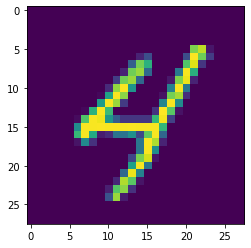

In [7]:
#actual picture
#plt.imshow(df[3])
no = np.array(df.iloc[41978,1:])
plt.imshow(no.reshape(28,28))

In [5]:
df = pd.read_csv('/Users/kamal/Documents/Datasets/digit-recognizer/original/train.csv')
df2 = pd.read_csv('/Users/kamal/Documents/Datasets/digit-recognizer/original/test.csv')

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df.shape)

(42000, 785)


In [10]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [11]:
#test set
test_set = df2
print(test_set.shape)
#train test split
x = df.iloc[:,1:]
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

(28000, 784)


In [12]:
#SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [13]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma = 'auto',C = .1))
clf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma='auto', kernel='linear'))])

In [14]:
print(clf.score(x_test,y_test))
print(clf.score(x_train, y_train))

0.9305555555555556
0.9859523809523809


In [15]:
clf2 = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', gamma = 'auto',C = 7))
clf2.fit(x_train,y_train)
print(clf2.score(x_test,y_test))
print(clf2.score(x_train, y_train))

0.9642063492063492
0.9983673469387755


In [16]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB().fit(x_train,y_train)
nbc.score(x_test,y_test)

0.5594444444444444

In [17]:
#K Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance').fit(x_train,y_train)
print(knn.score(x_test, y_test))
print(knn.score(x_train, y_train))

0.9669047619047619
1.0


In [19]:
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance').fit(x_train,y_train)
print(knn.score(x_test, y_test))
print(knn.score(x_train, y_train))
knn_final = KNeighborsClassifier(n_neighbors = 3, weights='distance').fit(x,y)

0.9670634920634921
1.0


In [20]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train,y_train)
print(knn.score(x_test, y_test))
print(knn.score(x_train, y_train))

0.9657142857142857
0.9758843537414966


In [21]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
print(rfc.score(x_test, y_test))
print(rfc.score(x_train, y_train))

0.963015873015873
1.0


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbcf = GradientBoostingClassifier(learning_rate=0.01).fit(x_train,y_train)
print(gbcf.score(x_test, y_test))
print(gbcf.score(x_train, y_train))

0.8394444444444444
0.8446598639455782


In [ ]:
#submission
test_y = knn_final.predict(test_set)
imageId = range(1,28001)
submit = pd.DataFrame(list(zip(imageId, test_y)),columns =['ImageId', 'Label'])
submit.head(20)

In [ ]:
#to_csv
submit.to_csv('output3.csv',index = False)

In [25]:
#Data Augmentation
print('done')


done
